### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


### Setting Seed
I have set the seed value of the two libraries namely tensorflow and numpy, so that later the code could be reproduceable.

In [302]:
np.random.seed(42)
tf.random.set_seed(7)

### Reading Data into DataFrame

In [307]:
df = pd.read_csv('BankRecords.csv')
df

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


### Checking Null values
I have checked the null values in the dataset so that if I found any null record, Either I can replace that with suitable value or simply remove that from the data to get better results of the models.

In [308]:
df.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### Checking Information
This will tesll us some of the details about the features of the dataset, data type of each feature, total columns and rows and the index of the rows and the memory usage. 

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

### Drop the unnecessary columns
I have drop the unnecessary column namely 'ID' as this have no impact on the income of any person as it is just an id of the row. If we do not remove this from the dataset it negatively impact on the model performance.

In [310]:
df.drop('ID', axis=1, inplace=True)

### Dataset Statistics
Here I have find statistics of the dataset in which it will show the count, mean, standard deviation, minimum value, 1st quartile, 2nd quartile, 3rd quartile and the Maximum valu of each numarical column in the dataset. which will help us in understanding the distribution of the features. We can see from these results that some values in the experience columns are negative which is not possible as experience can never be negative. So later we replace it with the mean value of that column.

In [311]:
df.describe()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


### Replacing negative values in Experience columns
As we found some negative values when we check the statistics of the data so here i have replace that values with the mean values of that column as we can't remove that records as we have already very low amount of data.

In [312]:
# Calculating the mean of the Experience column, excluding negative values
mean_experience = df[df['Experience(Years)'] >= 0]['Experience(Years)'].mean()

# Replacing values in the Experience column that are less than 0 with the mean value
df.loc[df['Experience(Years)'] < 0, 'Experience(Years)'] = mean_experience

### Visualizing Categorical Class Count

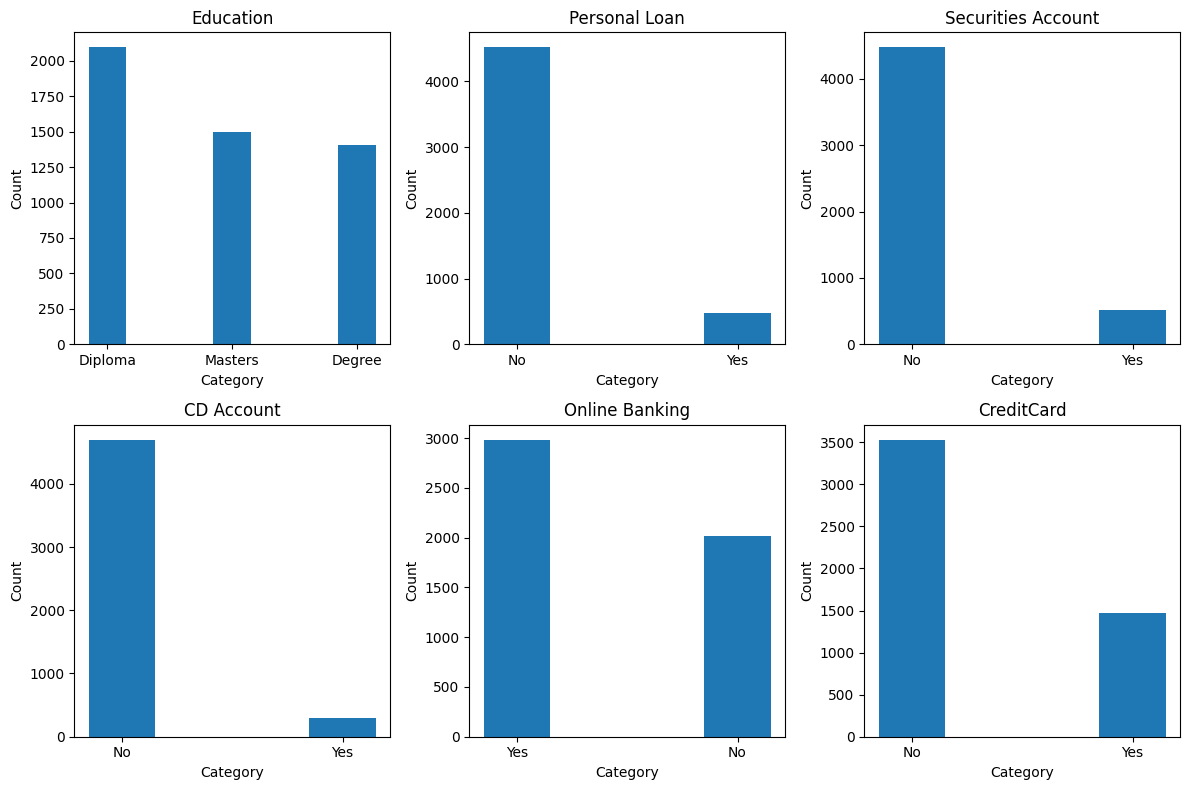

In [313]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Ploting bar graphs for each categorical column
for i, column in enumerate(categorical_columns):
    # Counting the frequency of each category
    counts = df[column].value_counts()
    
    # Creating a bar plot
    axes[i].bar(counts.index, counts.values, width=0.3)
    axes[i].set_title(column)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')

# Adjusting layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Checking Correlation 
This will help us in understanding the correlation between features itself and the features with the target class.

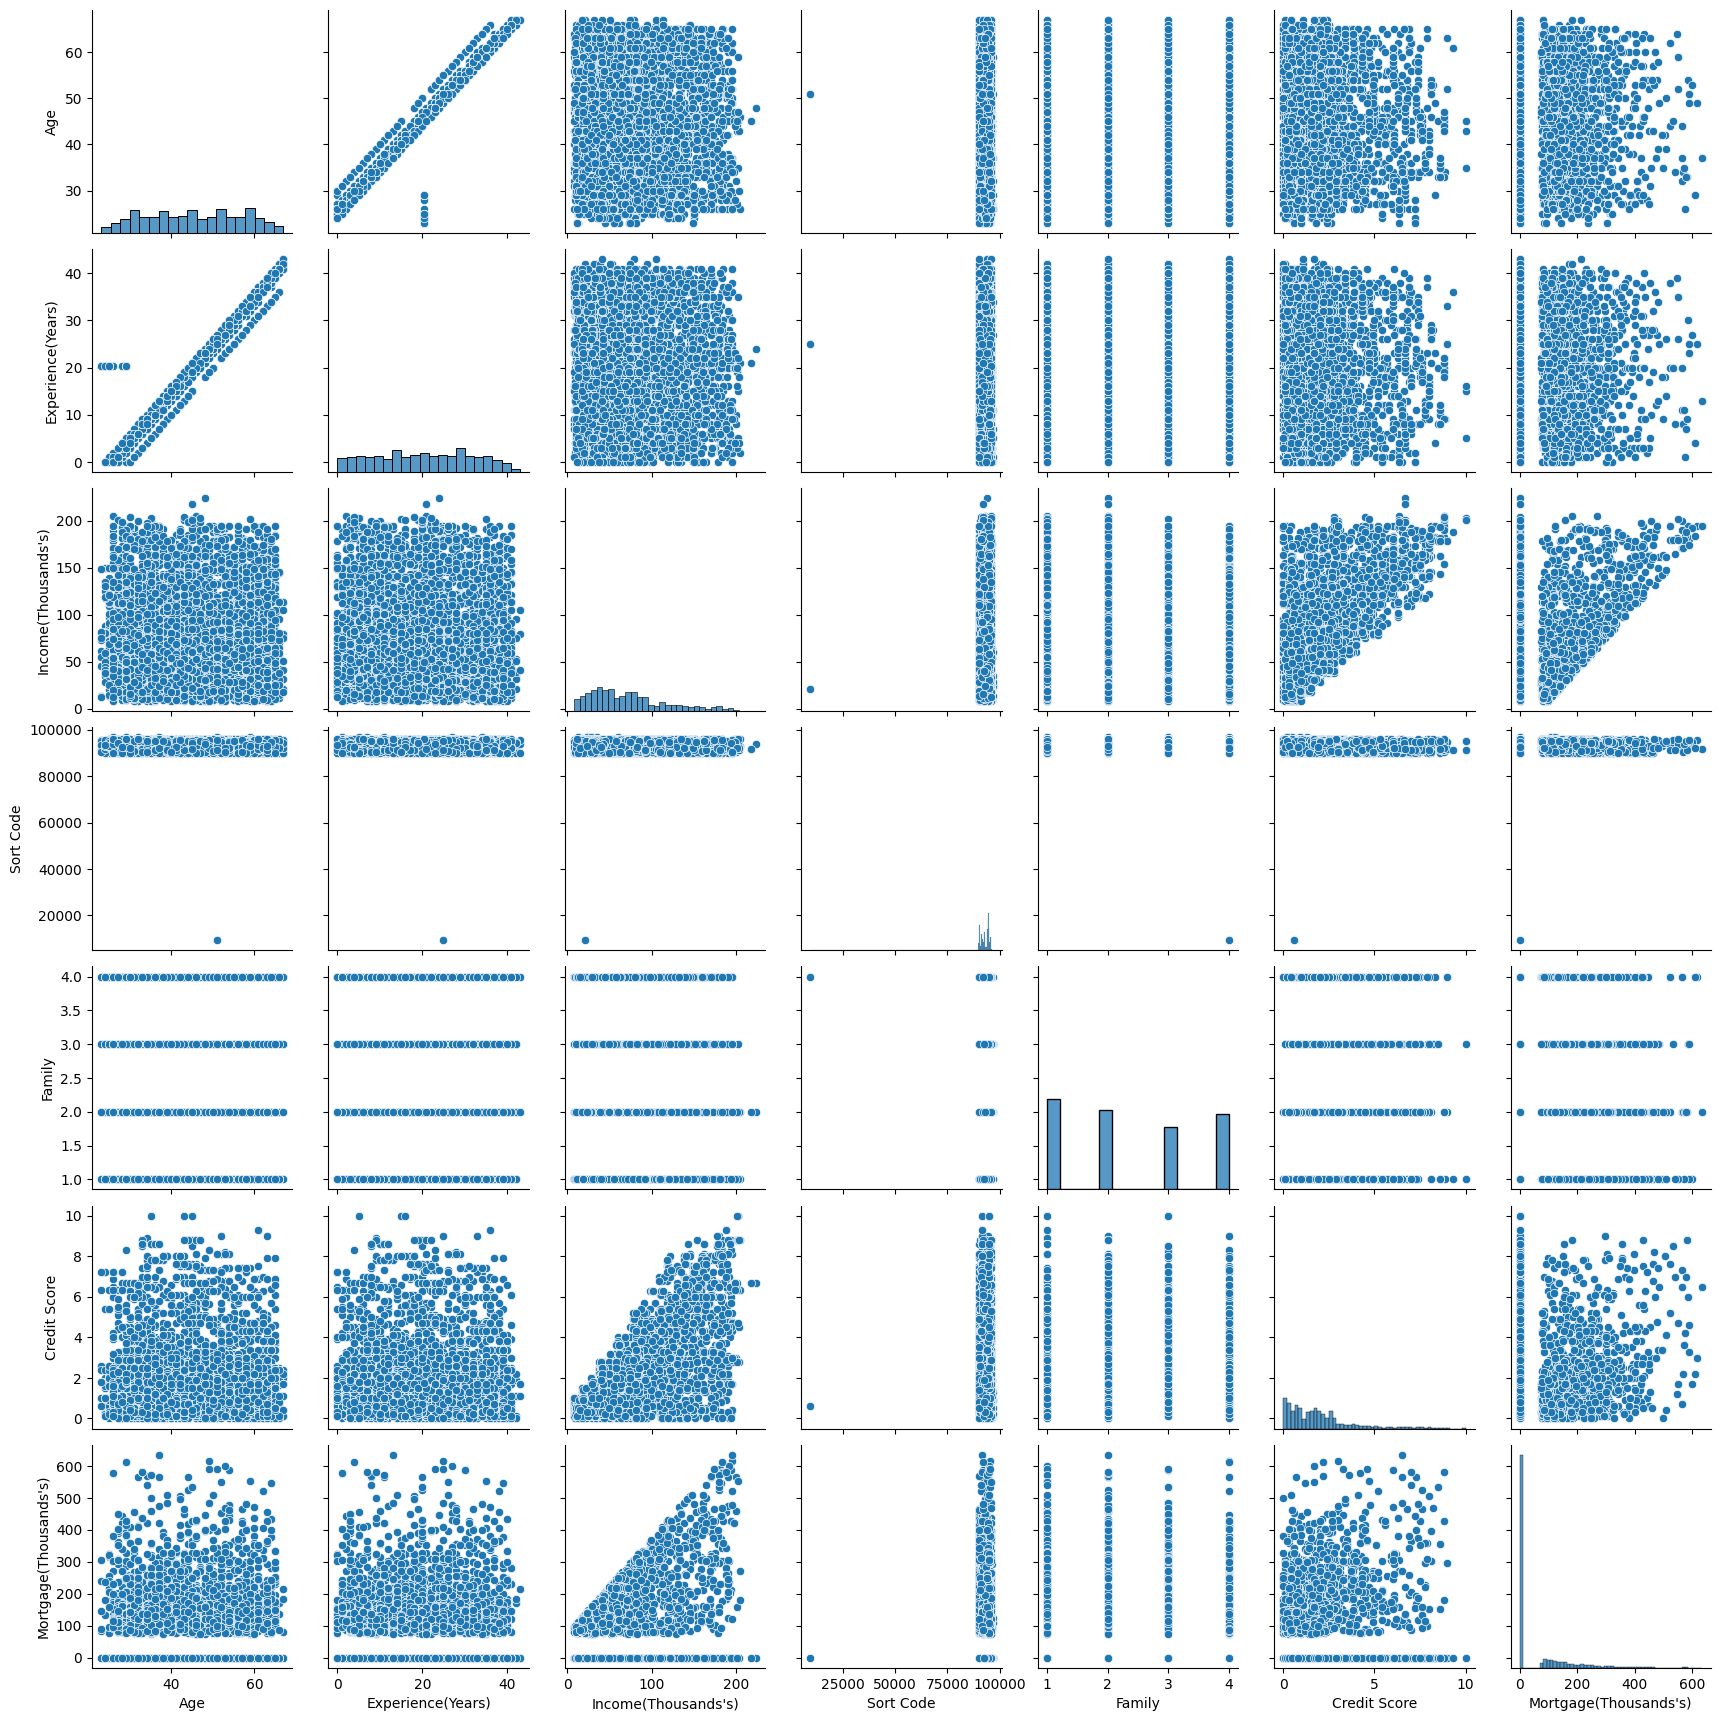

In [314]:
sns.pairplot(df)

### One Hot Encoding
I have convert the categorical columns of Nominal type into numerical value using a get_dummies method of pandas library. I have convert this as all the models expect the data should be numerical values so this encoding convert the data into values that ML and DL models expects.

In [315]:
def one_hot_encode_columns(df, columns):

    return pd.get_dummies(df, columns=columns, drop_first=True)

# Specifying the columns to be one-hot encoded
columns_to_encode = ['Personal Loan','Securities Account','CD Account','Online Banking','CreditCard']

# Performing one-hot encoding
encoded_df = one_hot_encode_columns(df, columns_to_encode)
encoded_df

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan_Yes,Securities Account_Yes,CD Account_Yes,Online Banking_Yes,CreditCard_Yes
0,25,1.0,49,91107,4,1.6,Diploma,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,Diploma,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,Diploma,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,Degree,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,Degree,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,92697,1,1.9,Masters,0,0,0,0,1,0
4996,30,4.0,15,92037,4,0.4,Diploma,85,0,0,0,1,0
4997,63,39.0,24,93023,2,0.3,Masters,0,0,0,0,0,0
4998,65,40.0,49,90034,3,0.5,Degree,0,0,0,0,1,0


### Encoding education column
The education column is an orinal type. It is an ordinal column because in this column the order of the categories matter, so i have encode this column with the Ordinal_Encoder which will take care of the order of the categories as I have passed the order of the categories.

In [316]:
oe = OrdinalEncoder(categories=[['Diploma','Degree','Masters']])
encoded_df['Education'] = oe.fit_transform(encoded_df[['Education']])

### Scaling the data
I have scale the whole data with the MinMax scalor. It will scale the column in a way that all the values in each column will be between 0 and 1. It will remove the descrimination of the units like some features values are in the form of Thousands, some are in yaers etc.It will scale the values but not change the distribution of the data. I have used two scalor one for feature scaling and the second one is for target column so that later after the predictio of the model I can convert he values back to the original scale

In [317]:
X = encoded_df.drop('Income(Thousands\'s)', axis =1)
y = encoded_df['Income(Thousands\'s)']
mms_features = MinMaxScaler()
mms_target = MinMaxScaler()
X_scaled = mms_features.fit_transform(X[X.columns.to_list()])
y_scaled = mms_target.fit_transform(pd.DataFrame(y))
columns = (X.columns.tolist())
columns.append('Income(Thousands\'s)')
df_final = pd.DataFrame(np.concatenate([X_scaled, y_scaled], axis =1), columns= columns)

### Train test split
Here I have split the data into train and test sets. SO that I can train the model on the training data and validate the model on the validation data during the time of training in case of deep learning model. Finally, the trained model will be used to predict the results on the unseen test data. 

In [369]:
X = df_final.drop('Income(Thousands\'s)', axis =1)
y = df_final['Income(Thousands\'s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, shuffle = True)

### Checking shape of the sets

In [370]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((3200, 12), (800, 12), (1000, 12), (3200,), (800,), (1000,))

# Implmenting Deep Learning model 
- I have implemented the multilayer perceptron neural Network or short for MLPNN. I have stacked multiple custom layers to get the best results. I have used mean absolute error as a loss function. The reason for selcting this function instead of others like mean squared error etc. is that we have scaled the data which scale values between 0 ana 1 and now if we used MSE as error function that will show the reduced error as it will square a value that is already between 0 and 1 which will not reflect the actual error instead show the reduced error. Thats why I have selected MAE as error function. The rational behind selecting MLPNN is that it have multiple layers that flow the information one after the other after processing the information. I have used Adam as an optimizer and also tune the learning rate by setting it to different values. 

### Learning Rate = 0.0001

In [363]:
# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_absolute_error')

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 64)                832       
                                                                 
 dense_269 (Dense)           (None, 128)               8320      
                                                                 
 dense_270 (Dense)           (None, 256)               33024     
                                                                 
 dense_271 (Dense)           (None, 512)               131584    
                                                                 
 dense_272 (Dense)           (None, 256)               131328    
                                                                 
 dense_273 (Dense)           (None, 128)               32896     
                                                                 
 dense_274 (Dense)           (None, 64)              

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.1959 - val_loss: 0.1558
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1383 - val_loss: 0.1221
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1162 - val_loss: 0.1123
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1105 - val_loss: 0.1096
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1074 - val_loss: 0.1059
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1054 - val_loss: 0.1061
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1043 - val_loss: 0.1064
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 0.1054
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1008 - val_loss: 0.1047
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1012 - val_loss: 0.1040
Epoch 11/

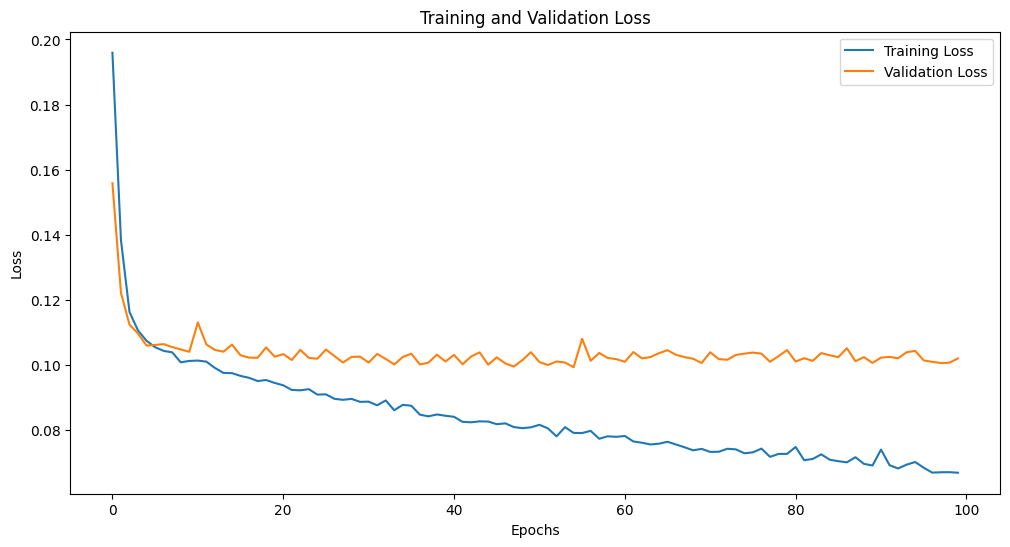

In [364]:
# Train the model
results = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data = (X_valid, y_valid))

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

- The model is not converge with this learning rate
- This show a complete overfitting of the model with this learning rate
- Now we try with different learning rate

### Learning Rate = 0.00001

In [381]:
# Building the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_absolute_error')

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_300 (Dense)           (None, 64)                832       
                                                                 
 dense_301 (Dense)           (None, 128)               8320      
                                                                 
 dense_302 (Dense)           (None, 256)               33024     
                                                                 
 dense_303 (Dense)           (None, 512)               131584    
                                                                 
 dense_304 (Dense)           (None, 256)               131328    
                                                                 
 dense_305 (Dense)           (None, 128)               32896     
                                                                 
 dense_306 (Dense)           (None, 64)              

In [382]:
# Train the model
results = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data = (X_valid, y_valid))

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.2596 - val_loss: 0.2416
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.2079 - val_loss: 0.1931
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1734 - val_loss: 0.1677
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1590 - val_loss: 0.1568
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1531 - val_loss: 0.1506
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1479 - val_loss: 0.1443
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1426 - val_loss: 0.1387
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1375 - val_loss: 0.1331
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1322 - val_loss: 0.1277
Epoch 10/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1277 - val_loss: 0.1235
Epoch 11/

### results plot

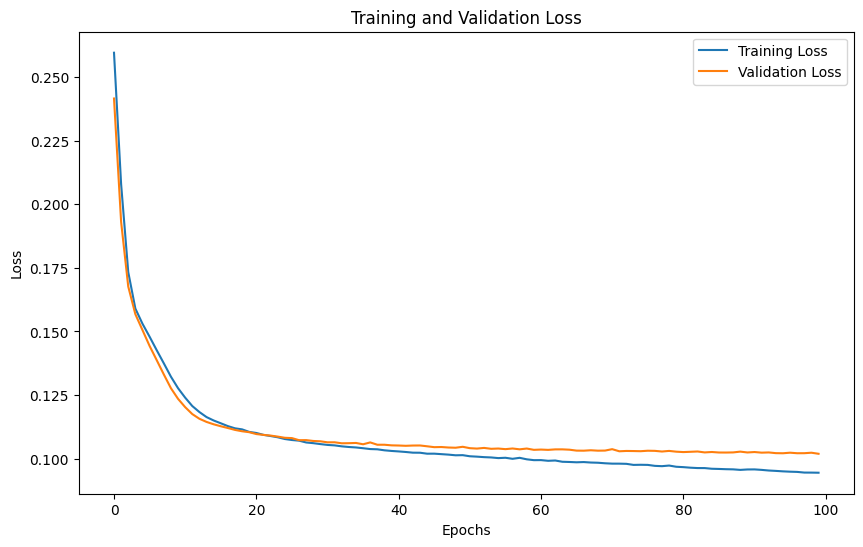

In [383]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [384]:
# Evaluate the model on the test set
mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")


32/32 [==============================] - 0s 2ms/step - loss: 0.1007
Mean Absolute Error on Test Set: 0.10069417208433151


In [385]:
# Making predictions
y_pred = model.predict(X_test)

# Converting values back to original scale
y_test_list = mms_target.inverse_transform([y_test.tolist()])[0]
y_pred_list = mms_target.inverse_transform([y_pred.flatten().tolist()])[0]


# Printing some predictions
for i in range(5):
    print(f"True value: {y_test_list[i]}, Predicted value: {y_pred_list[i]}")

32/32 [==============================] - 0s 2ms/step
True value: 23.0, Predicted value: 29.924853920936584
True value: 83.0, Predicted value: 70.1217954158783
True value: 72.0, Predicted value: 57.98192322254181
True value: 81.0, Predicted value: 59.97533667087555
True value: 120.00000000000001, Predicted value: 140.8066053390503


## Implementing Machine Learning Model
### Linear Regression
I have selected the Linear Regression Model to train it on my dataset and compare the results of it with the deep learning model. The rational behind selecting the Linear regression is that it used the close form solution to find the exact parameters value that will make it possible for robust prediction. As it uses a closed form solution which often provide more accurate results compare to the other machine learning models but at the same time its complexity is very high, we can ignore this part as our dataset is very small so even with the high complexity we can train the model easily on our dataset  .

In [386]:
# Perform Train Test Split
X = df_final.drop('Income(Thousands\'s)', axis=1)
y = df_final['Income(Thousands\'s)']
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)


In [387]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error is {mae}')

Mean Absolute Error is 0.11407943237392831


- We can clearly see that the deep learning model perform better than the ML model.
- DL model show an MAE value of 0.10, while ML model show an MAE value of 0.11. 
- As this is an error values, so the lower the values the best is the model.
- DL perform better as it has the ability to capture the complex pattrens more robustly than ML due to its deeper network.